<a href="https://colab.research.google.com/github/Melisacid/Evaluacion/blob/main/DF_Mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MELISA HERNANDEZ CID

A01732341

In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**DF_Mexico**



In [2]:
df= pd.read_csv("DF_Mexico.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638.0,https://www.airbnb.com/rooms/2056638,2.023030e+13,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354.0,https://www.airbnb.com/rooms/2072354,2.023030e+13,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037.0,https://www.airbnb.com/rooms/696037,2.023030e+13,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797.0,https://www.airbnb.com/rooms/35797,2.023030e+13,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616.0,https://www.airbnb.com/rooms/44616,2.023030e+13,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  float64
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [4]:
#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3596
Length: 75, dtype: int64

## **ETAPA 1: Preprocesamiento de DATOS**

### 1. Aplicar métodos para reemplazar valores nulos y justificar el método aplicado para cada columna o dataframe

Columnas con **NULOS a eliminar**, decidi eliminarlas debido a que como no tienen ningun tipo de información, considero que es lo mejor.
ELIMINAR: neighbourhood_group_cleansed, bathrooms , calendar_updated, license

In [5]:
df2 = df.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"], axis=1)

Columnas con **NULOS que decidí cambiar a STRING**, esto debido a que por la naturaleza de los datos considero que es mejor ponerlo como "sin información".

STRING:name,description, neighborhood_overview,host_name,host_location,host_about, host_response_time, host_neighbourhood, neighbourhood, bathrooms_text, first_review, last_review, host_location


In [6]:
#Sustituir valores nulos por un string en concreto
df2["name"] = df2["name"].fillna("INFO NO DADA")
df2["description"] = df2["description"].fillna("INFO NO DADA")
df2["neighborhood_overview"] = df2["neighborhood_overview"].fillna("INFO NO DADA")
df2["host_name"] = df2["host_name"].fillna("INFO NO DADA")
df2["host_about"] = df2["host_about"].fillna("INFO NO DADA")
df2["host_response_time"] = df2["host_response_time"].fillna("INFO NO DADA")
df2["host_neighbourhood"] = df2["host_neighbourhood"].fillna("INFO NO DADA")
df2["neighbourhood"] = df2["neighbourhood"].fillna("INFO NO DADA")
df2["bathrooms_text"] = df2["bathrooms_text"].fillna("INFO NO DADA")
df2["first_review"] = df2["first_review"].fillna("INFO NO DADA")
df2["last_review"] = df2["last_review"].fillna("INFO NO DADA")
df2["host_location"] = df2["host_location"].fillna("INFO NO DADA")

Columnas con **NULOS que cambie por MEDIA**, debido a la naturaleza de sus datos ( númericos o cuantitaticos) y por el nombre de sus columnas opté porque sea mejor poner la media de esas columnas para sustituir los nulos. Como primer paso las columnas de host_response_rate, host_acceptance_rate que estaban en object las pase a float64 para que se pudiera realizar el procedimiento. 

MEDIA:host_response_rate, host_acceptance_rate, bedrooms, beds, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value

In [7]:
#CONVERSION DE TIPO DE DATO DE COLUMNA A TIPO OBJECT A FLOAT 
df2["host_response_rate"] = df2["host_response_rate"].str.replace('%', '').astype(float)
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].str.replace('%', '').astype(float)

In [8]:
df2["host_response_rate"] = df2["host_response_rate"].fillna(df2["host_response_rate"].mean())
df2["host_acceptance_rate"] = df2["host_acceptance_rate"].fillna(df2["host_acceptance_rate"].mean())
df2["bedrooms"] = df2["bedrooms"].fillna(df2["bedrooms"].mean())
df2["beds"] = df2["beds"].fillna(df2["beds"].mean())
df2["minimum_minimum_nights"] = df2["minimum_minimum_nights"].fillna(df2["minimum_minimum_nights"].mean())
df2["maximum_minimum_nights"] = df2["maximum_minimum_nights"].fillna(df2["maximum_minimum_nights"].mean())
df2["minimum_maximum_nights"] = df2["minimum_maximum_nights"].fillna(df2["minimum_maximum_nights"].mean())
df2["maximum_maximum_nights"] = df2["maximum_maximum_nights"].fillna(df2["maximum_maximum_nights"].mean())
df2["review_scores_rating"] = df2["review_scores_rating"].fillna(df2["review_scores_rating"].mean())
df2["review_scores_accuracy"] = df2["review_scores_accuracy"].fillna(df2["review_scores_accuracy"].mean())
df2["review_scores_cleanliness"] = df2["review_scores_cleanliness"].fillna(df2["review_scores_cleanliness"].mean())
df2["review_scores_checkin"] = df2["review_scores_checkin"].fillna(df2["review_scores_checkin"].mean())
df2["review_scores_communication"] = df2["review_scores_communication"].fillna(df2["review_scores_communication"].mean())
df2["review_scores_location"] = df2["review_scores_location"].fillna(df2["review_scores_location"].mean())
df2["review_scores_value"] = df2["review_scores_value"].fillna(df2["review_scores_value"].mean())

Cambiar **NULOS por BACKWARDFILL**, creo que en esta columna fue lo mejor ya que la naturaleza de estos datos era t (true) y f (false) por lo que considere que  una opción podría ser utilizar la técnica de backwardfill para reemplazar los valores nulos con el valor del último valor no nulo en la columna. De esta manera, los valores faltantes se llenarán con la última respuesta verdadera o falsa que se haya registrado. 

BACKWARDFILL: host_is_superhost

In [9]:
df2["host_is_superhost"] = df2["host_is_superhost"].fillna(method="bfill")

Cambiar **NULOS por MEDIANA** , en esta parte opté por cambiar los nulos por la mediana ya que estas columnas ya contienen el promedio, es por ello que opté que fuera la mediana(ya que es una medida robusta que no se ve afectada por valores extremos o atípicos) ya que si no sería el promedio del promedio lo que no me parecio tan buena idea .

MEDIANA: minimum_nights_avg_ntm, maximum_nights_avg_ntm, reviews_per_month

In [10]:
df2["minimum_nights_avg_ntm"] = df2["minimum_nights_avg_ntm"].fillna(df2["minimum_nights_avg_ntm"].median())
df2["maximum_nights_avg_ntm"] = df2["maximum_nights_avg_ntm"].fillna(df2["maximum_nights_avg_ntm"].median())
df2["reviews_per_month"] = df2["reviews_per_month"].fillna(df2["reviews_per_month"].median())

In [11]:
#Identificar valores nulos por columna
valores_nulos=df2.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 71, dtype: int64

In [12]:
#Corroboramos NULOS
valores_nulosN=df2.isnull().sum().sum()
valores_nulosN

0

## Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers de cada dataframe y justificar el método aplicado

**Ocuparé Rango Intercuartílico** ya que la distribución de los datos no necesariamente es normal y puede contener valores atípicos que afecten a la media y desviación estándar. El método del IQR es más robusto y se basa en la mediana y el rango intercuartílico para identificar los valores atípicos.

In [13]:
#SEPARAMOS LAS COLUMNAS CUANTITATIVAS DEL DATA2
import pandas as pd
# Verificar los tipos de datos de cada columna
print(df2.dtypes)
# Seleccionar las variables numéricas
numeric = df2.select_dtypes(include="number")
# Mostrar el DataFrame resultante
print(numeric)

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 71, dtype: object
                 id     scrape_id    host_id  host_response_rate  \
0      2.056638e+06  2.023030e+13   10531228          100.000000   
1      2.072354e+06  2.023030e+13   16840050           94.538778   
2      6.960370e+05  2.023030e+13    3531879          100.000000   
3      3.579700e+04  2.023030e+13     153786           94.538778   
4      4.461600e+0

In [14]:
numeric.info()
#nos damos cuenta que son numericas por el dtype 
#float64 e int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  float64
 1   scrape_id                                     24224 non-null  float64
 2   host_id                                       24224 non-null  int64  
 3   host_response_rate                            24224 non-null  float64
 4   host_acceptance_rate                          24224 non-null  float64
 5   host_listings_count                           24224 non-null  int64  
 6   host_total_listings_count                     24224 non-null  int64  
 7   latitude                                      24224 non-null  float64
 8   longitude                                     24224 non-null  float64
 9   accommodates                                  24224 non-null 

In [15]:
numeric.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638.0,2.023030e+13,10531228,100.000000,91.456246,3,7,19.35353,-99.16299,3,...,4.950000,5.000000,4.950000,5.000000,4.860000,3,3,0,0,0.19
1,2072354.0,2.023030e+13,16840050,94.538778,91.456246,3,3,19.35358,-99.16948,2,...,4.880000,4.930000,5.000000,4.950000,4.840000,2,2,0,0,0.54
2,696037.0,2.023030e+13,3531879,100.000000,90.000000,4,4,19.44180,-99.18402,6,...,4.710000,4.920000,4.920000,4.580000,4.710000,3,3,0,0,0.31
3,35797.0,2.023030e+13,153786,94.538778,91.456246,1,1,19.38283,-99.27178,2,...,4.746342,4.827133,4.815533,4.832627,4.708674,1,1,0,0,1.14
4,44616.0,2.023030e+13,196253,100.000000,86.000000,16,16,19.41162,-99.17794,14,...,4.700000,4.870000,4.780000,4.980000,4.480000,12,3,2,0,0.46


In [16]:
numeric2=numeric.copy()

<Figure size 1500x800 with 0 Axes>

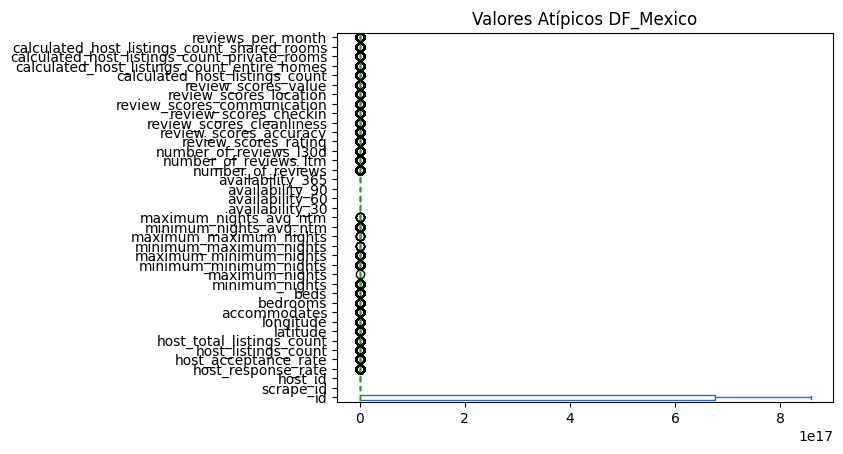

In [17]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
numeric2.plot(kind='box', vert=False)
plt.title("Valores Atípicos DF_Mexico")
plt.show() #dibujamos el diagrama

In [18]:
#Encuentro cuartiles 0.25 y 0.75
y=numeric2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)

Limite superior permitido id                                              1.690169e+18
scrape_id                                       2.023030e+13
host_id                                         6.839189e+08
host_response_rate                              1.081918e+02
host_acceptance_rate                            1.128156e+02
host_listings_count                             2.850000e+01
host_total_listings_count                       3.200000e+01
latitude                                        1.949915e+01
longitude                                      -9.911735e+01
accommodates                                    7.000000e+00
bedrooms                                        3.500000e+00
beds                                            3.500000e+00
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+0

In [19]:
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite inferior permitido id                                             -1.014102e+18
scrape_id                                       2.023030e+13
host_id                                        -3.333808e+08
host_response_rate                              8.634695e+01
host_acceptance_rate                            7.864062e+01
host_listings_count                            -1.550000e+01
host_total_listings_count                      -1.600000e+01
latitude                                        1.931817e+01
longitude                                      -9.921716e+01
accommodates                                   -1.000000e+00
bedrooms                                       -5.000000e-01
beds                                           -5.000000e-01
minimum_nights                                 -5.000000e-01
maximum_nights                                 -1.237500e+03
minimum_minimum_nights                         -5.000000e-01
maximum_minimum_nights                         -2.000000e+0

In [20]:
#Encontramos Outliers del Dataframe
outliersm= numeric2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliersm

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.58,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.27178,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Obtenemos datos limpios del Dataframe
df3= df2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.056638e+06,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,10531228,...,5.000000,4.950000,5.000000,4.860000,NaN,3.0,3.0,0.0,0.0,0.19
1,2.072354e+06,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,16840050,...,4.930000,5.000000,4.950000,4.840000,NaN,2.0,2.0,0.0,0.0,0.54
2,6.960370e+05,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,3531879,...,4.920000,4.920000,NaN,4.710000,NaN,3.0,3.0,0.0,0.0,0.31
3,3.579700e+04,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,153786,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.14
4,4.461600e+04,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,196253,...,4.870000,4.780000,4.980000,4.480000,NaN,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,8.539240e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,488030249,...,4.827133,4.815533,4.832627,4.708674,NaN,2.0,2.0,0.0,0.0,1.14
24220,8.539670e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,506816029,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.14
24221,8.542250e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,154670560,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,0.0,1.0,0.0,1.14
24222,8.542480e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,7799414,...,4.827133,4.815533,4.832627,4.708674,NaN,13.0,13.0,0.0,0.0,1.14


In [22]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df3.isnull().sum()
valores_nulos

id                                                  0
listing_url                                     24224
scrape_id                                           0
last_scraped                                    24224
source                                          24224
                                                ...  
calculated_host_listings_count                   3224
calculated_host_listings_count_entire_homes      3444
calculated_host_listings_count_private_rooms     3076
calculated_host_listings_count_shared_rooms       576
reviews_per_month                                1373
Length: 71, dtype: int64

In [23]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.056638e+06,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,10531228,...,5.000000,4.950000,5.000000,4.860000,NaN,3.0,3.0,0.0,0.0,0.19
1,2.072354e+06,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,16840050,...,4.930000,5.000000,4.950000,4.840000,NaN,2.0,2.0,0.0,0.0,0.54
2,6.960370e+05,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,3531879,...,4.920000,4.920000,4.900000,4.710000,NaN,3.0,3.0,0.0,0.0,0.31
3,3.579700e+04,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,153786,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.14
4,4.461600e+04,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,196253,...,4.870000,4.780000,4.980000,4.480000,NaN,12.0,3.0,2.0,0.0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,8.539240e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,488030249,...,4.827133,4.815533,4.832627,4.708674,NaN,2.0,2.0,0.0,0.0,1.14
24220,8.539670e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,506816029,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.14
24221,8.542250e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,154670560,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,0.0,1.0,0.0,1.14
24222,8.542480e+17,NaN,2.023030e+13,NaN,NaN,NaN,NaN,NaN,NaN,7799414,...,4.827133,4.815533,4.832627,4.708674,NaN,13.0,13.0,0.0,0.0,1.14


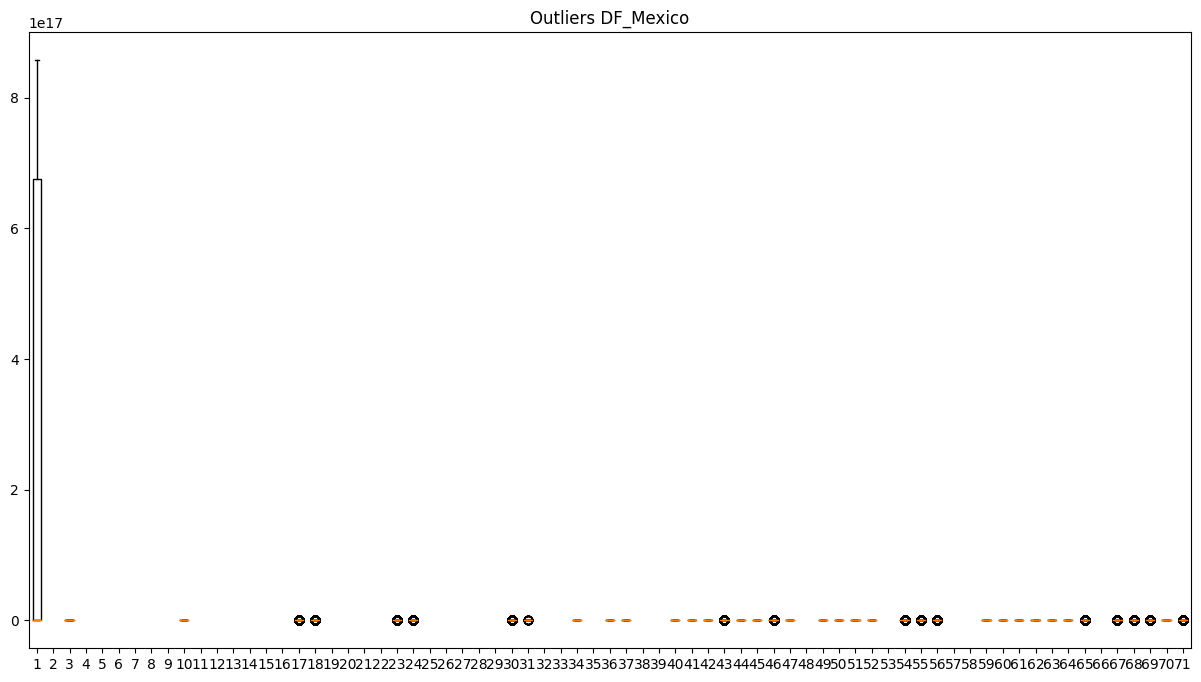

In [24]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(15, 8))
plt.boxplot(df4) 
plt.title("Outliers DF_Mexico")
plt.show() #dibujamos el diagrama

In [25]:
df2.select_dtypes(include=['object'])

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,INFO NO DADA,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/13,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",t,30/03/23,03/01/14,24/06/18,f
1,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,16/06/14,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,t,30/03/23,01/01/14,04/11/22,f
2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/12,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",t,29/03/23,31/10/12,21/12/22,f
3,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/10,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","$3,658.00",t,29/03/23,INFO NO DADA,INFO NO DADA,f
4,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,INFO NO DADA,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/10,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","$18,000.00",t,30/03/23,09/11/11,26/03/23,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,https://www.airbnb.com/rooms/853923589855678923,30/03/23,city scrape,Rincón Mexico lindo!,Este lugar tiene una ubicación estratégica: ll...,INFO NO DADA,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/488030249,Ana,16/11/22,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Wifi"", ""Iron"", ""Washer"", ""Sel...",$760.00,t,30/03/23,INFO NO DADA,INFO NO DADA,f
24220,https://www.airbnb.com/rooms/853966732274073000,29/03/23,city scrape,Departamento en zona diamante.,"Ubicado en zona diamante, junto al aeropuerto,...",INFO NO DADA,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/506816029,Jacqueline Vivian,24/03/23,...,Entire rental unit,Entire home/apt,1 bath,"[""Lake access"", ""Ski-in/Ski-out"", ""Wifi"", ""Out...","$1,520.00",t,29/03/23,INFO NO DADA,INFO NO DADA,t
24221,https://www.airbnb.com/rooms/854225071295768399,29/03/23,city scrape,Habitación privada en magnífica casa,Relájate en este espacio muy tranquilo y elega...,INFO NO DADA,https://a0.muscache.com/pictures/db71951a-8696...,https://www.airbnb.com/users/show/154670560,Aroa,15/10/17,...,Private room in home,Private room,2.5 shared baths,"[""Luggage dropoff allowed"", ""Shared patio or b...",$533.00,t,29/03/23,INFO NO DADA,INFO NO DADA,f
24222,https://www.airbnb.com/rooms/854247693069190865,30/03/23,city scrape,Espacioso y luminoso loft - Roma,What else does it come with?<br />- WIFI 100MB...,INFO NO DADA,h

In [26]:
cuali = df2.select_dtypes(include=['object'])
limpios_MEXICO = pd.concat([cuali, df4], axis=1)
limpios_MEXICO.head()

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/2056638,30/03/23,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,INFO NO DADA,https://a0.muscache.com/pictures/28353712/4379...,https://www.airbnb.com/users/show/10531228,Maria,09/12/13,...,5.000000,4.950000,5.000000,4.860000,NaN,3.0,3.0,0.0,0.0,0.19
1,https://www.airbnb.com/rooms/2072354,30/03/23,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,https://www.airbnb.com/users/show/16840050,Mónica,16/06/14,...,4.930000,5.000000,4.950000,4.840000,NaN,2.0,2.0,0.0,0.0,0.54
2,https://www.airbnb.com/rooms/696037,29/03/23,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,10/09/12,...,4.920000,4.920000,4.900000,4.710000,NaN,3.0,3.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/35797,29/03/23,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,28/06/10,...,4.827133,4.815533,4.832627,4.708674,NaN,1.0,1.0,0.0,0.0,1.14
4,https://www.airbnb.com/rooms/44616,30/03/23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,INFO NO DADA,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,09/08/10,...,4.870000,4.780000,4.980000,4.480000,NaN,12.0,3.0,2.0,0.0,0.46


In [27]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=limpios_MEXICO.isnull().sum().sum()
valores_nulos

775168

## **ETAPA 2: Extracción  de DATOS**

a) host_acceptance_rate> 50%

Aqui decidi multiplicar esa columna por 100, ya que en el csv o excel estan en % pero en excel aparecen por ejemplo como 0.71, entonces al multiplicarlo por 100 seria 71, y posteriomente que solo se quedara con los mayor a 50.

In [28]:
h_a_r_m=limpios_MEXICO[limpios_MEXICO['host_acceptance_rate']*100 > 50]

Sólo los registros con categoría “superhost”

In [41]:
superhost_m=df[df['host_is_superhost'] == 't']


Los registros que no hallan verificado identidad “not identity_verified”

In [42]:
identity_m=df[df['host_identity_verified'] == 'f']

Los registro cuyo property_type = “Private room” y “Hotel room”

In [43]:
prop_type=df[df['property_type'].isin(['Private room', 'Hotel room'])]

Los registros que cuenten con bathroom > 1

In [45]:
#cambiar Half-bath, Shared half-bath, Private half-bath, sin informacion
df["bathrooms_text"] = df["bathrooms_text"].str.replace('Half-bath', '0.5').str.replace('Shared half-bath', '0.5').str.replace('Private half-bath', '0.5').str.replace('sin informacion', '0')

#se extraen los numeros y se guardan como string en la misma columna
df["bathrooms_text"] = df["bathrooms_text"].str.extract('(\d+\.?\d*)', expand=False)

#cambiar columna a float
df["bathrooms_text"] = df["bathrooms_text"].astype(float)

In [49]:
bathrooms_m=bathrooms_m=df[df['bathrooms_text'] > 1]

Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”

In [51]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
price_m=df[(df['price'] > 10000) & (df['room_type'] == 'Entire home/apt')]

<ipython-input-51-00bc017fa972>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


Los registros cuyo review_scores_cleanliness > 4.5

In [52]:
r_s_clean_m=df[df['review_scores_cleanliness'] > 4.5]

Los registros cuyo review_scores_value > 4.9

In [53]:
r_s_value_m= df[df['review_scores_value'] > 4.9]

Los registros cuya availability_365< 100

In [54]:
avail_365_m=df[df['availability_365'] < 100]

Los registros cuya host_response_time sea “within an hour”

In [55]:
h_r_time_m=df[df['host_response_time'] == 'within an hour']

ARCHIVOS A CSV

In [58]:
h_a_r_m.to_csv("host_acceptance_rate_MEX.csv")
superhost_m.to_csv("superhost_MEX.csv")
identity_m.to_csv("identity_verified_MEX.csv")
prop_type.to_csv("property_type_MEX.csv")
bathrooms_m.to_csv("bathrooms_MEX.csv")
price_m.to_csv("price_roomtype_MEX.csv")
r_s_clean_m.to_csv("review_scores_cleanliness_MEX.csv")
r_s_value_m.to_csv("review_scores_value_MEX.csv")
avail_365_m.to_csv("availability_365_MEX.csv")
h_r_time_m.to_csv("host_response_time_MEX.csv")

In [59]:
from google.colab import files 
  

files.download("host_acceptance_rate_MEX.csv")
files.download("superhost_MEX.csv")
files.download("identity_verified_MEX.csv")
files.download("property_type_MEX.csv")
files.download("bathrooms_MEX.csv")
files.download("price_roomtype_MEX.csv")
files.download("review_scores_cleanliness_MEX.csv")
files.download("review_scores_value_MEX.csv")
files.download("availability_365_MEX.csv")
files.download("host_response_time_MEX.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>